The purpose of this notebook is to show descriptive statistics about the data. It helps to get insight into the data to help answer certain questions.

    -On average, how much do customers spend?
    -What is the typical price of items?
    -Which types of products are the most popular by characteristics?
    -What portion of customers spend low, high, or medium?
    -Are the prices helping sales?
    -What is the general trend of sales?
    -Find any data handling that needs to be done to properly predict in another notebook.


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.ExcelFile('Fashion Data/DataPenjualanFashion.xlsx')

print(data.sheet_names)

data = pd.read_excel('Fashion Data/DataPenjualanFashion.xlsx', sheet_name=None)

['DASHBOARD', 'SalesItems', 'ProductItems', 'Pivot Table']


c:\Users\Tanis\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Slicer List extension is not supported and will be removed
  warn(msg)


All product names are unique, all are from the same brand, and all data are from females. These are not needed for future predictions

In [108]:
products = data['ProductItems']
products 

,product_id,product_name,category,brand,color,size,catalog_price,cost_price,gender
0,1,Soft Wrap Dress,Dresses,Tiva,Green,S,40.41,20.70,Female
1,2,Soft Wrap Tee,T-Shirts,Tiva,White,S,78.45,53.76,Female
2,3,Soft Linen Tee,T-Shirts,Tiva,Green,XL,23.90,14.81,Female
3,4,Soft Ribbed Tee,T-Shirts,Tiva,White,S,60.00,34.78,Female
4,5,Soft Wrap Trousers,Pants,Tiva,Blue,M,36.84,16.46,Female
...,...,...,...,...,...,...,...,...,...
495,496,Tailored High-Waist Trousers,Pants,Tiva,Black,S,54.61,27.63,Female
496,497,Dresses Drop 8,Dresses,Tiva,Black,L,36.05,20.73,Female
497,498,T-Shirts Drop 8,T-Shirts,Tiva,White,L,38.33,16.23,Female
498,499,Sleepwear Drop 4,Sleepwear,Tiva,Green,M,30.07,20.82,Female


In [110]:
products['category'].value_counts()

category
Dresses      109
T-Shirts     108
Sleepwear    104
Shoes        100
Pants         79
Name: count, dtype: int64

In [112]:
products['color'].value_counts()

color
Black    104
Green    102
Blue     102
Red       98
White     94
Name: count, dtype: int64

In [113]:
products['size'].value_counts()

size
XS    107
S      84
XL     81
L      76
M      72
36     25
38     20
40     19
35     16
Name: count, dtype: int64

There is a funnel shape. Indicates non-constant variance. Good to handle when predictions will be made

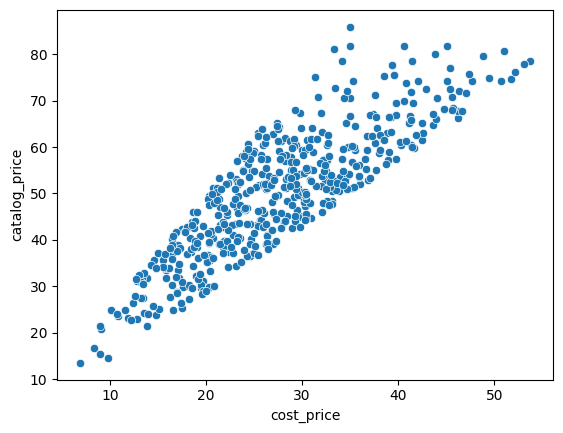

In [115]:
sns.scatterplot(x='cost_price', y='catalog_price', data=products)
plt.show()

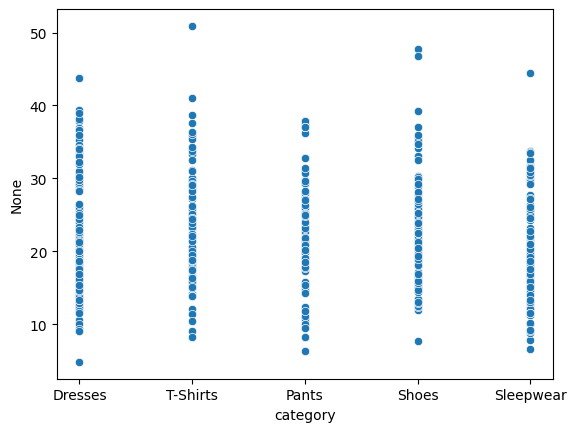

In [118]:
revenue = products['catalog_price'] - products['cost_price']

sns.scatterplot(x=products['category'], y=revenue, data=products)
plt.show()

This data has problems. Will tidy this data before proceeding. Opening a separate excel window to see which values belong to which variable

In [ ]:
pivot = data['Pivot Table']
pivot

In [98]:
channel_data = {'Channels' : ['App Mobile', 'E-commerce'],
                'Totals Of Original Price' : [53952.79, 57167.84]}

types_data = {'Type Product' : ['Dresses', 'Pants', 'Shoes', 'Sleepwear', 'T-Shirt', 'Grand Total'],
         'Total Catalog Price' : [5298.44, 3959.36, 5236.03, 4933.21, 5511.98, 24939.02], 
         'Total Cost Price' : [2917.77, 2149.76, 2908.44, 2785.75, 2962.69, 13724.41]}

channel = pd.DataFrame(channel_data)
types = pd.DataFrame(types_data)

In [99]:
channel

,Channels,Totals Of Original Price
0,App Mobile,53952.79
1,E-commerce,57167.84


In [100]:
types

,Type Product,Total Catalog Price,Total Cost Price
0,Dresses,5298.44,2917.77
1,Pants,3959.36,2149.76
2,Shoes,5236.03,2908.44
3,Sleepwear,4933.21,2785.75
4,T-Shirt,5511.98,2962.69
5,Grand Total,24939.02,13724.41


In [ ]:
pivot = pivot.dropna()
pivot = pivot.drop(19)
pivot = pivot.rename(columns={'Unnamed: 0' : 'Row Labels', 'Unnamed: 1' : 'Dresses', 'Unnamed: 2' : 'Pants', 
                      'Unnamed: 3' : 'Shoes','Unnamed: 4' : 'Sleepwear', 'Unnamed: 5' : 'T-Shirts', 
                      'Unnamed: 6' : 'Grand Total'})
pivot

In [102]:
pivot

,Row Labels,Dresses,Pants,Shoes,Sleepwear,T-Shirts,Grand Total
20,Black,18,13,26,26,21,104
21,Blue,26,17,23,13,23,102
22,Green,16,19,18,28,21,102
23,Red,27,14,19,18,20,98
24,White,22,16,14,19,23,94
25,Grand Total,109,79,100,104,108,500


Interpreting the pivot table. The total profit is 11,214.61. T-shirts generate the most profit. Pants generate the least profit. 

In [104]:
catalog = types['Total Catalog Price']
cost = types['Total Cost Price']

catalog - cost

0     2380.67
1     1809.60
2     2327.59
3     2147.46
4     2549.29
5    11214.61
dtype: float64

Looking at the numerical values of each column in data

Trying to see if there are any missing values or duplicates.
Finding the median and graphing the values to find outliers.
Seeing if there is imbalance in the dataset
Trying to also see any trends

In [2]:
sales_items = data['SalesItems']

sales_items

,quantity,original_price,unit_price,item_total,channel,channel_campaigns
0,1,81.80,81.80,81.80,App Mobile,App Mobile
1,1,81.79,81.79,81.79,E-commerce,Website Banner
2,1,80.76,80.76,80.76,App Mobile,App Mobile
3,1,78.52,78.52,78.52,App Mobile,App Mobile
4,1,78.52,78.52,78.52,App Mobile,App Mobile
...,...,...,...,...,...,...
2248,5,20.82,20.82,104.10,E-commerce,Website Banner
2249,5,20.82,20.82,104.10,E-commerce,Website Banner
2250,5,28.98,20.29,101.43,App Mobile,App Mobile
2251,5,16.69,16.69,83.45,App Mobile,App Mobile


Website banners seem to be the most effective at bringing in customers

In [106]:
sales_items['channel_campaigns'].value_counts()

channel_campaigns
Website Banner    1151
App Mobile         963
Social Media       120
Email               19
Name: count, dtype: int64

On average, customers spend $49.32. Without any potetial outliers, customers spend $49.76 on average

In [17]:
sales_items['original_price'].median()

np.float64(49.76)

In [4]:
sales_items['original_price'].describe()

count    2253.000000
mean       49.321185
std        13.077055
min        13.510000
25%        39.340000
50%        49.760000
75%        58.340000
max        85.900000
Name: original_price, dtype: float64

Data visualization of the original price

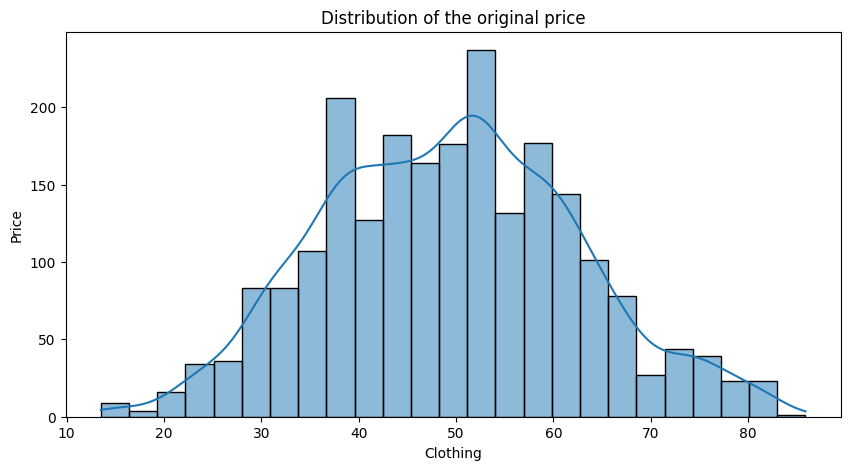

In [9]:
#Histogram of the original price
plt.figure(figsize=(10, 5))
sns.histplot(sales_items['original_price'], kde=True)
plt.title('Distribution of the original price')
plt.xlabel('Clothing')
plt.ylabel('Price')
plt.show()

Majority of customers are buying clothing items 35-65

Relationship between item total and original price. This is to see how much of the clothing price constitutes the final price.It also helps to see if customers are buying multiple of the same item.

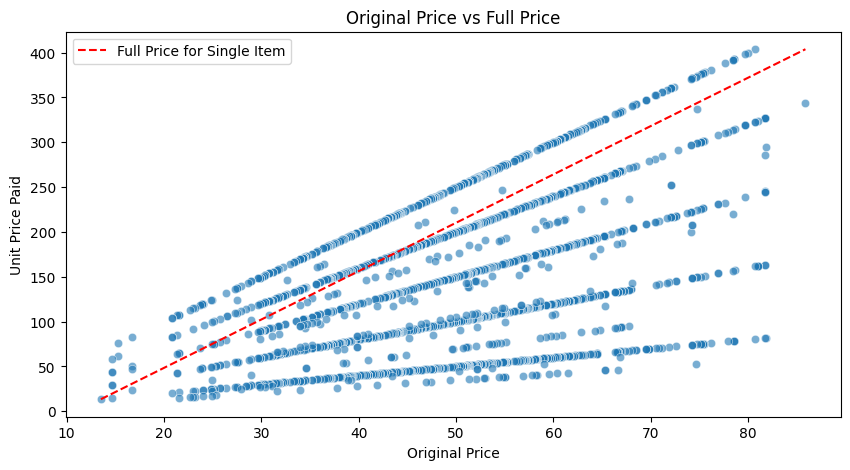

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=sales_items, x='original_price', y='item_total', alpha=0.6)
plt.plot([sales_items['original_price'].min(), sales_items['original_price'].max()],
         [sales_items['item_total'].min(), sales_items['item_total'].max()],
          color='red', linestyle='--', label='Full Price for Single Item')
plt.xlabel("Original Price")
plt.ylabel("Unit Price Paid")
plt.title("Original Price vs Full Price")
plt.legend()
plt.show()

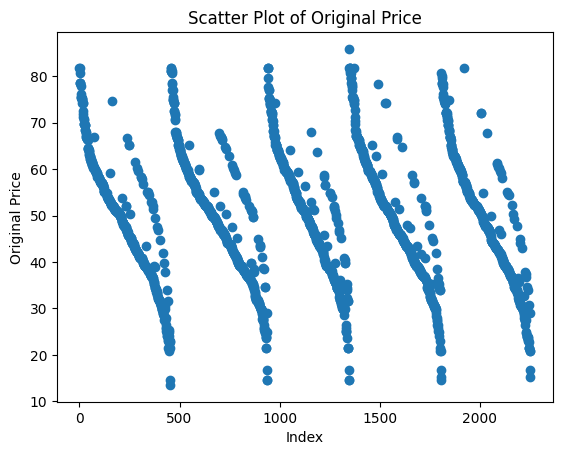

In [5]:
plt.scatter(sales_items.index, sales_items['original_price'])
plt.xlabel("Index")
plt.ylabel("Original Price")
plt.title("Scatter Plot of Original Price")
plt.show()

It seems like here are cycles for prices being high and low. Perhaps when a product gets released or when a specific time happens (season is an example) the price is at its highest. However, when the product gets older or when the time passes then the price drops

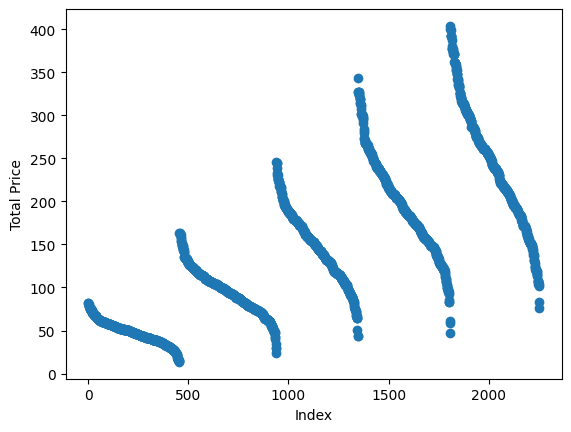

In [6]:
plt.scatter(sales_items.index, sales_items['item_total'])
plt.xlabel("Index")
plt.ylabel("Total Price")
plt.show()

This perhaps shows the total amount of money a customer spent during their shopping trip. It seems like customers are buying more items in later cycles. It does not seem like the business is selling more expensive items in later cycles, the previous plot does not indicate this. The customers could be buying multiple clothing items. The customers spending more money overtime shows a more positive outlook in predicting future revenue

In [7]:
sales_items['original_price'].value_counts()


original_price
31.84    17
65.26    15
52.08    14
64.08    12
51.00    12
         ..
30.19     1
24.13     1
80.00     1
52.42     1
43.30     1
Name: count, Length: 475, dtype: int64

unfinished

In [18]:
#binning to see value counts
bins = [13.51, 31.84, 51.00, 85.9]
labels = ["small", "medium", "large"]

df = pd.cut(sales_items['original_price'], bins=bins, labels=labels, right=False)

df.value_counts().sort_index()

original_price
small      206
medium    1006
large     1040
Name: count, dtype: int64

In [20]:
import seaborn as sns

correlation_matrix = sales_items.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

ValueError: could not convert string to float: 'App Mobile'

In [ ]:
math Video

https://www.youtube.com/watch?v=IdsV0RaC9jM